# Importar bibliotecas básicas

In [107]:
!pip install scikit-learn

In [108]:
!pip install sklearn.preprocessing

In [109]:
!pip install cython

In [110]:
!pip install --upgrade pip

In [111]:
!pip install seaborn

In [112]:
!pip install plotly

In [113]:
!pip install --upgrade numpy

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

# Importar dados

In [115]:
raw_data = pd.read_csv('data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [116]:
raw_data.sample()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
77943,53,72472,4,2,164,150,41,41,41.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Tratamento de dados

In [117]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             286467 non-null  int64  
 1    Flow Duration                286467 non-null  int64  
 2    Total Fwd Packets            286467 non-null  int64  
 3    Total Backward Packets       286467 non-null  int64  
 4   Total Length of Fwd Packets   286467 non-null  int64  
 5    Total Length of Bwd Packets  286467 non-null  int64  
 6    Fwd Packet Length Max        286467 non-null  int64  
 7    Fwd Packet Length Min        286467 non-null  int64  
 8    Fwd Packet Length Mean       286467 non-null  float64
 9    Fwd Packet Length Std        286467 non-null  float64
 10  Bwd Packet Length Max         286467 non-null  int64  
 11   Bwd Packet Length Min        286467 non-null  int64  
 12   Bwd Packet Length Mean       286467 non-nul

In [118]:
data = raw_data.iloc[0:100000].copy()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             100000 non-null  int64  
 1    Flow Duration                100000 non-null  int64  
 2    Total Fwd Packets            100000 non-null  int64  
 3    Total Backward Packets       100000 non-null  int64  
 4   Total Length of Fwd Packets   100000 non-null  int64  
 5    Total Length of Bwd Packets  100000 non-null  int64  
 6    Fwd Packet Length Max        100000 non-null  int64  
 7    Fwd Packet Length Min        100000 non-null  int64  
 8    Fwd Packet Length Mean       100000 non-null  float64
 9    Fwd Packet Length Std        100000 non-null  float64
 10  Bwd Packet Length Max         100000 non-null  int64  
 11   Bwd Packet Length Min        100000 non-null  int64  
 12   Bwd Packet Length Mean       100000 non-null

In [120]:
data.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [121]:
# Replace inf and -inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [122]:
data.dropna(inplace=True)

In [123]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Divisão entre previsores e classe

In [124]:
from sklearn.preprocessing import LabelEncoder

atributo = ' Label'
le = LabelEncoder()
data[atributo] = le.fit_transform(data[atributo].values)        

In [125]:
print(le.classes_)

['BENIGN' 'PortScan']


In [126]:
df_train_y = data[' Label']
df_train_x = data.drop(' Label', axis=1)

# Normalização

In [127]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
x_norm        = minmax_scaler.fit_transform(df_train_x)

# PCA - redução de dimensões

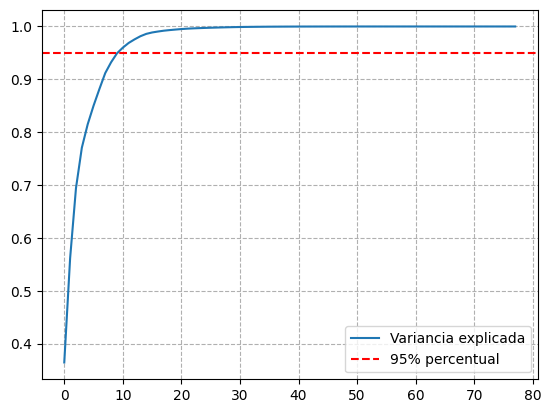

In [128]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variancia explicada')
plt.axhline(0.95,color='red',linestyle='--',label='95% percentual')
plt.grid(True, linestyle='--')
plt.legend()

In [129]:
pca       = PCA(n_components=10)
dados_pca = pca.fit_transform(x_norm)
df_train_x = pd.DataFrame(dados_pca)
df_train_x.head()
# sns.scatterplot(x=dados_pca[:,0],y=dados_pca[:,1],hue=Y)

,0,1,2,3,4,5,6,7,8,9
0,0.577824,-0.145870,-0.485201,0.081761,0.081086,-0.126047,0.129791,-0.025021,0.222664,-0.164003
1,0.578134,-0.145435,-0.484856,0.081676,0.081046,-0.126082,0.129479,-0.024894,0.222703,-0.163993
2,-0.868304,0.498525,-0.204386,-0.456535,0.138709,-0.147991,0.227302,0.444619,-0.132975,-0.177126
3,0.578347,-0.145351,-0.485016,0.081705,0.081675,-0.125819,0.129781,-0.025145,0.222509,-0.163989
4,-0.968527,0.628508,-0.339852,-0.491751,-0.019093,0.170647,0.059903,0.176369,-0.009354,-0.167902


# Salvar bases de dados

In [121]:
# data = data.drop_duplicates()

In [132]:
df_train_y = pd.DataFrame(df_train_y)
df_train_x = pd.DataFrame(df_train_x)

In [133]:
# Convert only float64 columns to float32
df_train_x = df_train_x.apply(lambda x: x.astype('float32') if x.dtype == 'float64' or x.dtype == 'int64' else x)
df_train_y = df_train_y.apply(lambda x: x.astype('float32') if x.dtype == 'float64' or x.dtype == 'int64' else x)



In [134]:
df_train_x.to_csv('pstrain_x', index=False)
df_train_y.to_csv('pstrain_y', index=False)
